# A JAX FRAMEWORK FOR MULTI-AGENT RESEARCH IN DECENTRALISED ENERGY MARKETS

***Author: K. Emerson*** \
***Department of Computer Science*** \
***Faculty of Sciences and Bioengineering Sciences*** \
***Vrije Universiteit Brussel***

---
File contains code to create the plots as used in the chapter: Experimental setup

In [6]:
import datetime
import os
import sys
from typing import Dict, Optional

import jax
import matplotlib.dates as mdates  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir(module_path)
sys.path.append('/workspaces/Thesis_MARL_in_Decentralised_Energy_Networks/code/')
sys.path.append('/workspaces/Thesis_MARL_in_Decentralised_Energy_Networks/code/src')
sys.path.append('/workspaces/Thesis_MARL_in_Decentralised_Energy_Networks/code/data_synthetic_process')
from notebooks.experiment_analysis_helpers import CB_COLORS
from src.prosumer.prosumer_factory import _generate_dummy_sine_wave
from data_synthetic_preprocess import consumption_helpers as synthcons
from data_synthetic_preprocess import production_helpers as synthprod

FIGSIZE = (10,8)

YEAR_START = 0
YEAR_END = 24*365
WEEK_1_START = 0
WEEK_1_END = 24*7*1
WEEK_2_START = 24*7*30
WEEK_2_END = 24*7*31
DAY_1_START = 0
DAY_1_END = 24
DAY_2_START = 24*7*30
DAY_2_END = 24*(7*30+1)

ACTOR_LIST = ["actor_00","actor_01","actor_02","actor_03","actor_04","actor_05","actor_06","actor_07"]

# Double Sine Wave Function Plots

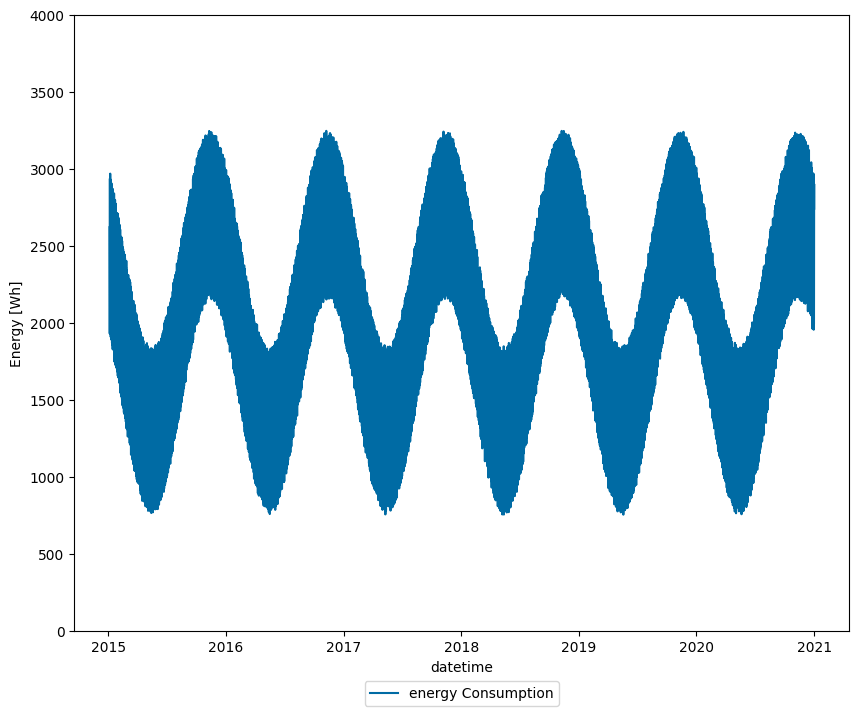

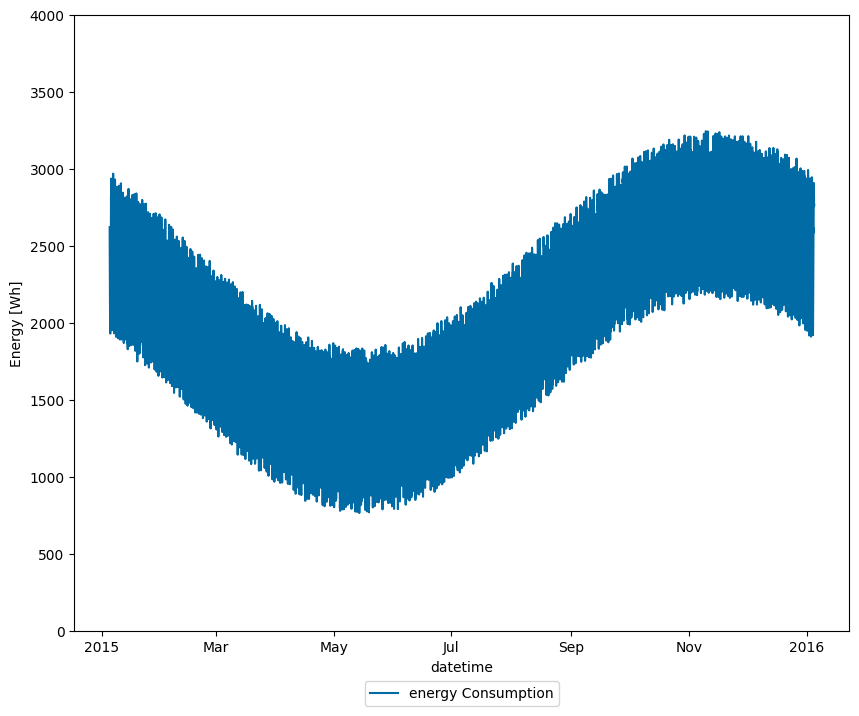

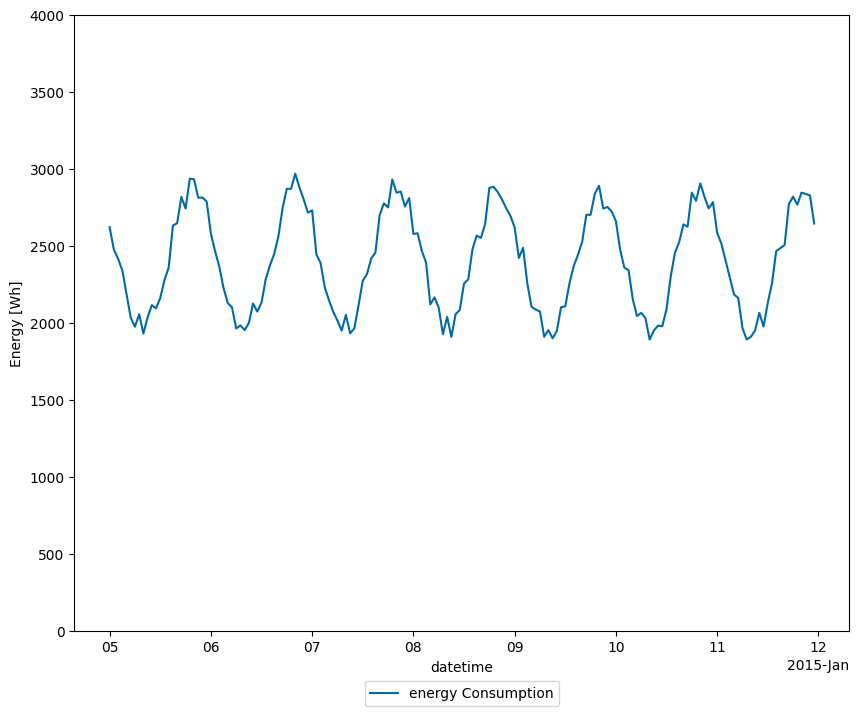

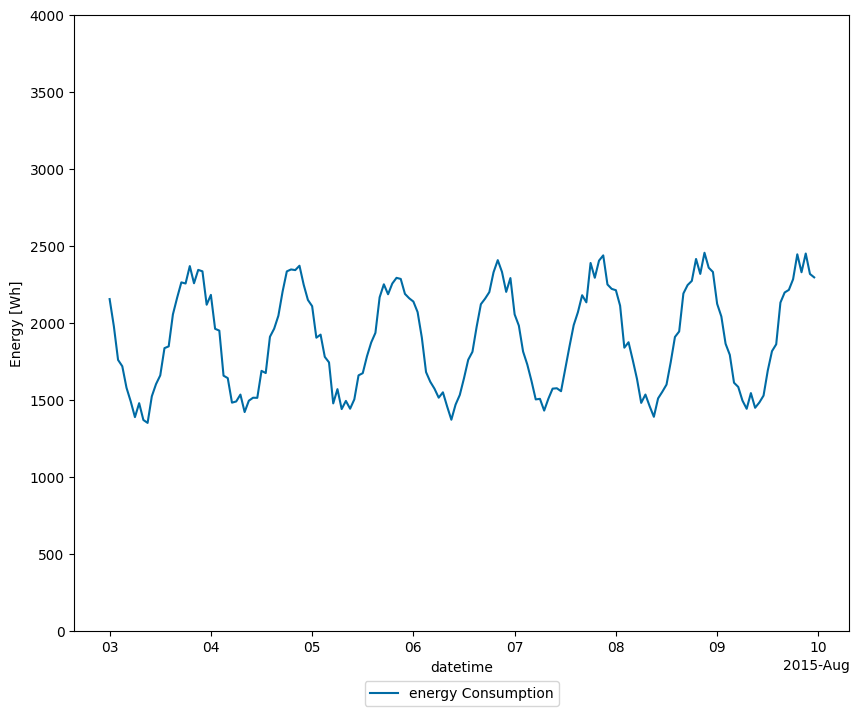

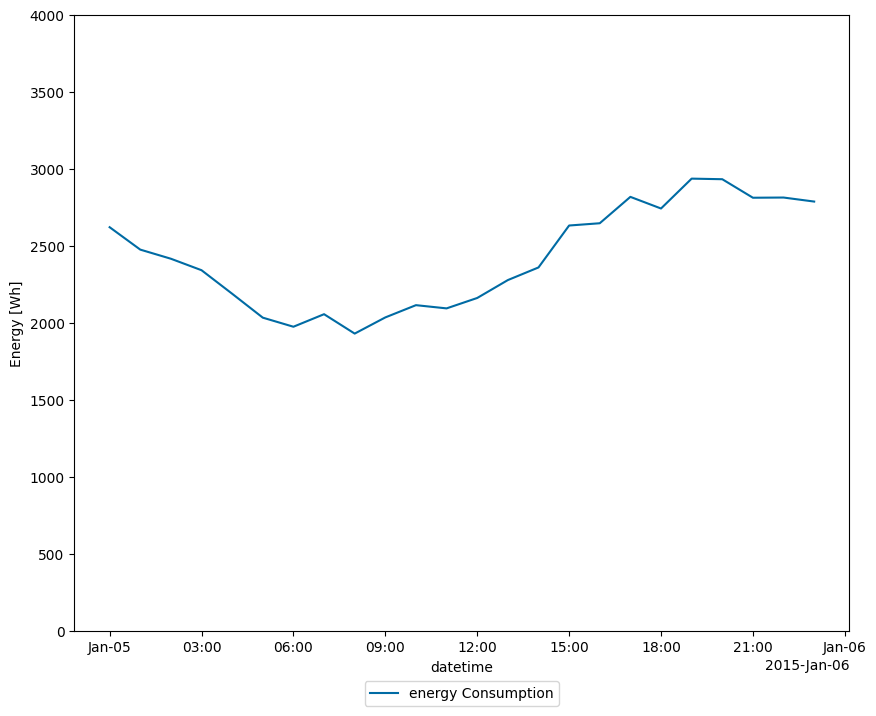

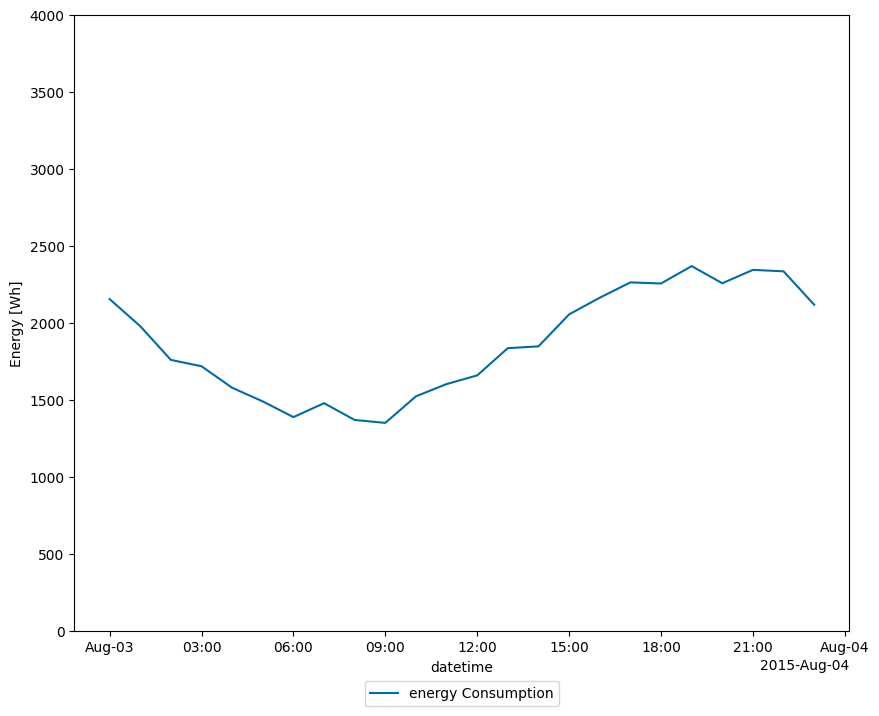

In [19]:
def plot_sine_wave(
        dates_data: pd.Series,
        sin_wave_data: jax.Array,
        start_index:Optional[int]=None,
        end_index:Optional[int]=None,
        filename: str = ''
        ) -> None:

    fig, ax = plt.subplots(figsize=FIGSIZE)
       
    start = start_index if start_index else 0
    end = end_index if end_index else len(dates_data)
        
    x = dates_data[start:end]
    y = sin_wave_data[start:end]
    ax.plot(x,y,color = CB_COLORS['dark_blue'], label=f"energy Consumption")
    ax.set_xlabel('datetime')
    ax.set_ylabel('Energy [Wh]')
    ax.set_ylim(0,4000)
    locator = mdates.AutoDateLocator(minticks=3, maxticks={"YEARLY":1,"MONTHLY":1,"HOURLY":1})
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.legend(loc='upper center', ncols=3, bbox_to_anchor=(0.5, -0.07),)
    if filename:
        plt.savefig(filename,format="pdf")
    else:
        plt.show()


start_date = "2015-01-05"
nbr_of_samples = 52512
base = datetime.datetime.strptime(start_date, "%Y-%m-%d")
date_list = pd.Series([base + datetime.timedelta(hours=x) for x in range(nbr_of_samples)])  

sine_wave_values = _generate_dummy_sine_wave(
    nbr_of_samples = nbr_of_samples,
    hourly_phase_offset = 10000,#5*24,
    mean_energy_consumption_Wh = 2000,
    yearly_energy_consumption_Wh_amplitude = 700,
    daily_energy_consumption_Wh_amplitude = 450,
    noise_amplitude =100,
    seed = 5)


folder = os.path.join("notebooks","synthetic_data_plots")
plot_sine_wave(date_list,sine_wave_values,filename=os.path.join(folder,"sinewave_cons_all.pdf"))
plot_sine_wave(date_list,sine_wave_values,YEAR_START,YEAR_END,filename=os.path.join(folder,"sinewave_cons_year.pdf"))         
plot_sine_wave(date_list,sine_wave_values,WEEK_1_START,WEEK_1_END,filename=os.path.join(folder,"sinewave_cons_week_jan.pdf"))
plot_sine_wave(date_list,sine_wave_values,WEEK_2_START,WEEK_2_END,filename=os.path.join(folder,"sinewave_cons_week_aug.pdf"))
plot_sine_wave(date_list,sine_wave_values,DAY_1_START,DAY_1_END,filename=os.path.join(folder,"sinewave_cons_day_jan.pdf"))
plot_sine_wave(date_list,sine_wave_values,DAY_2_START,DAY_2_END,filename=os.path.join(folder,"sinewave_cons_day_aug.pdf"))

# Actor Energy Consumption Plots

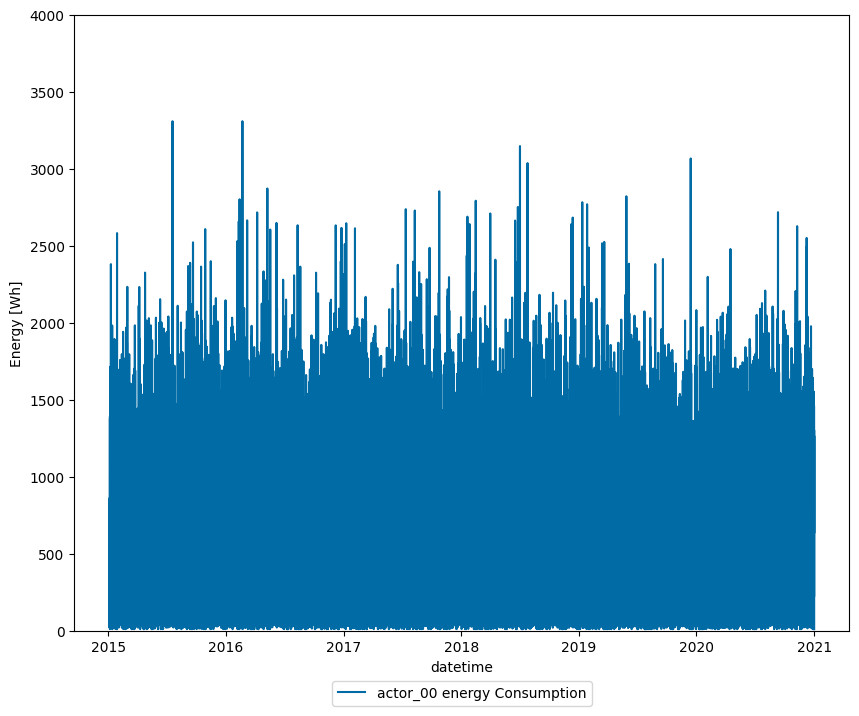

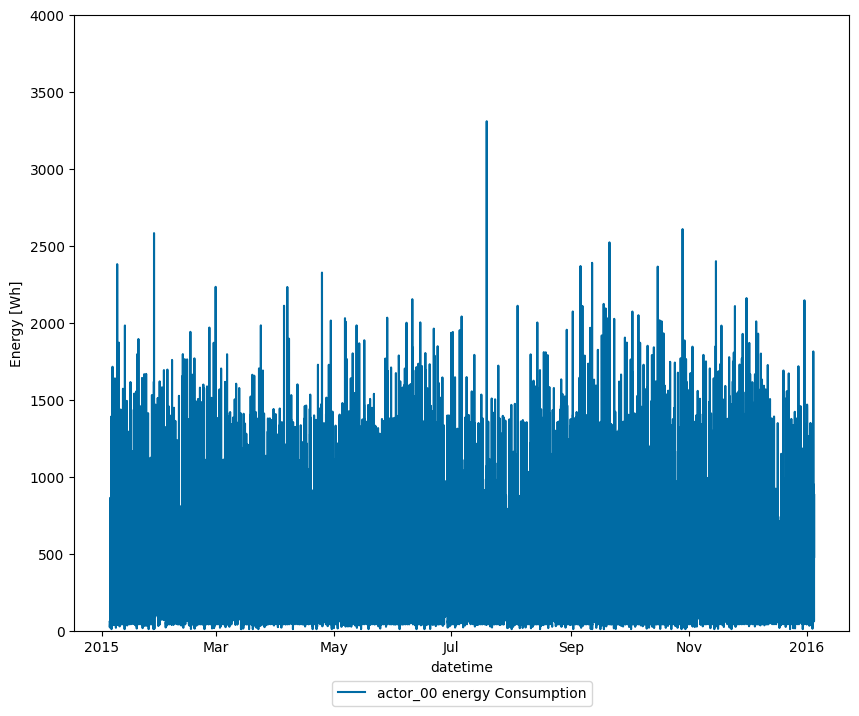

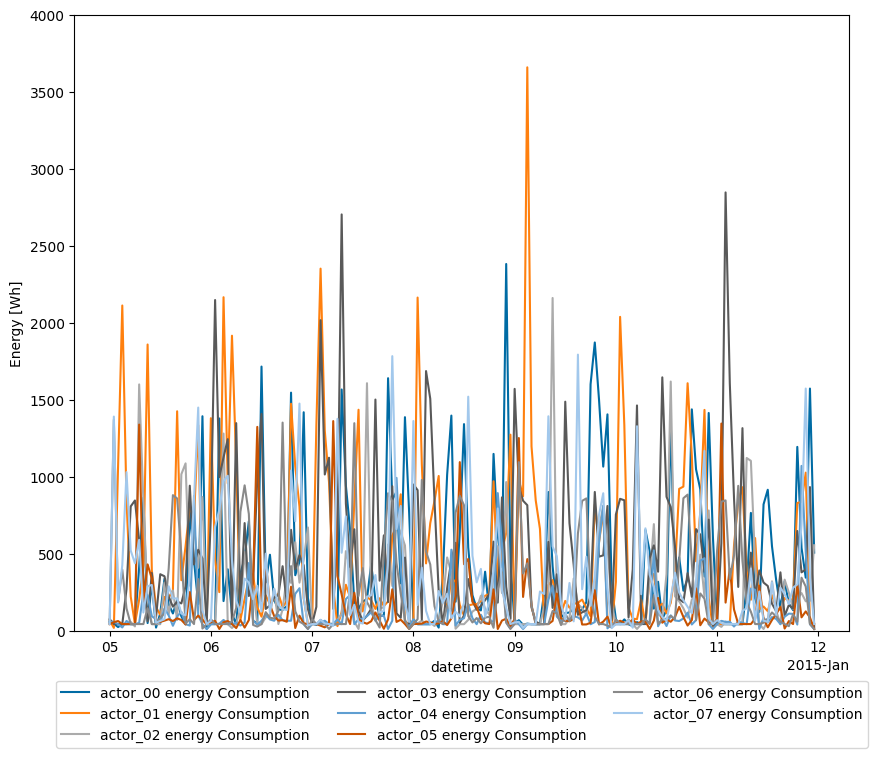

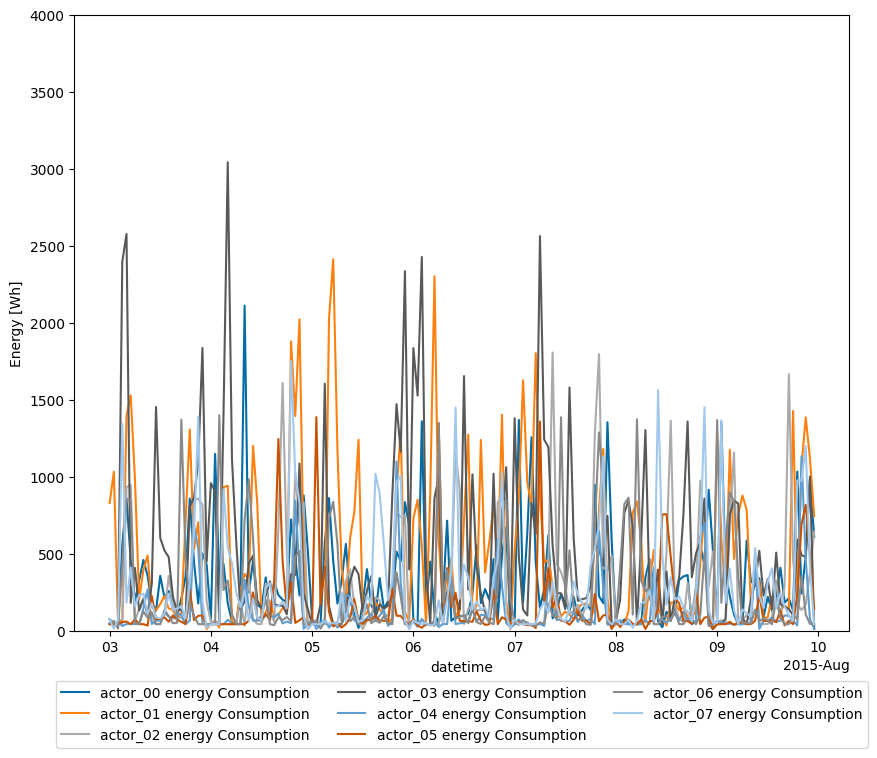

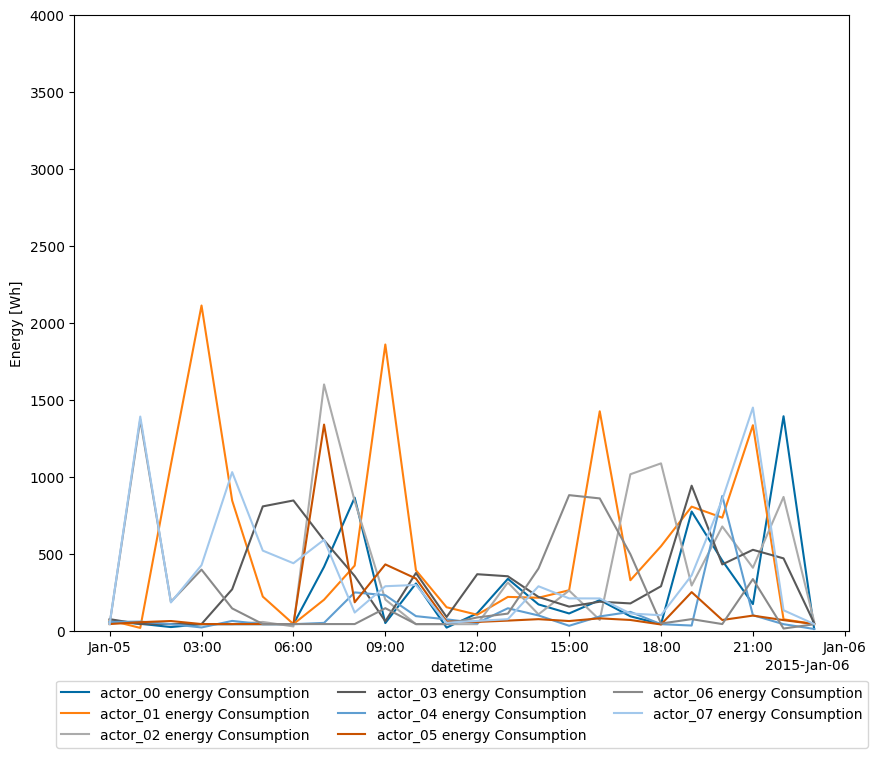

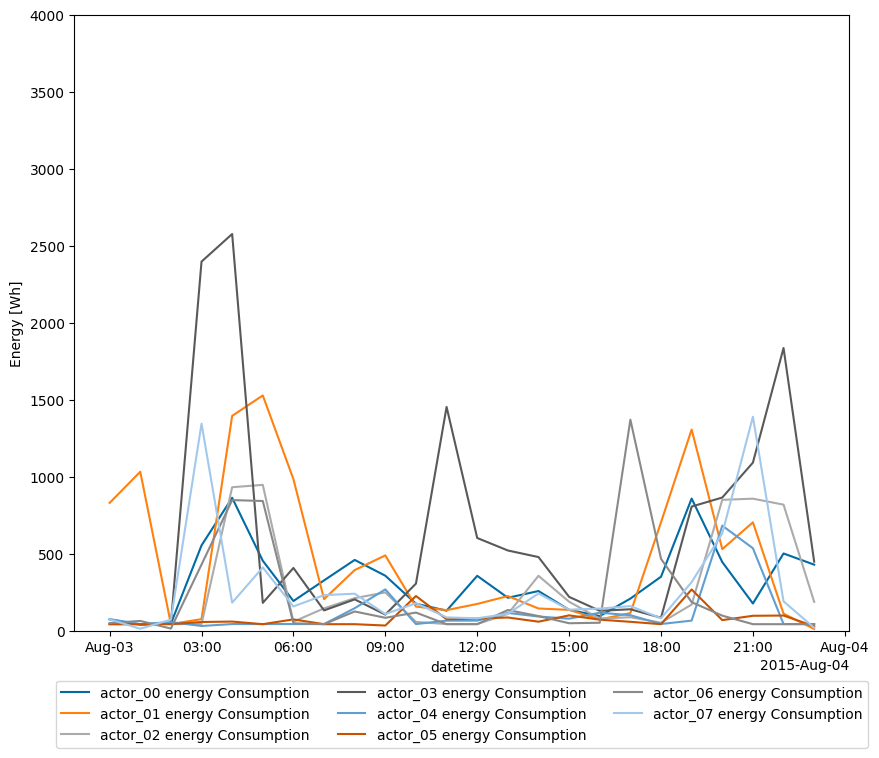

In [ ]:
def plot_agents_consumption(
        agents_pv_production:Dict[str,pd.DataFrame],
        start_index:Optional[int]=None,
        end_index:Optional[int]=None,
        filename:str="") -> None:

    fig, ax = plt.subplots(figsize=FIGSIZE)
    
    actor_names = list(agents_pv_production.keys())
    color_list = list(CB_COLORS.values())
    color = 0
    for actor_name in actor_names:
        x = agents_pv_production[actor_name]["Datetime"]
        start = start_index if start_index else 0
        end = end_index if end_index else len(x)
        
        x = np.asarray(x, dtype='datetime64[s]')[start:end]
        ax.plot(x,agents_pv_production[actor_name]["Energy_Consumed_Wh"][start:end],color =color_list[color], label=f"{actor_name} energy Consumption")
        color += 1
    ax.set_xlabel('datetime')
    ax.set_ylabel('Energy [Wh]')
    ax.set_ylim(0,4000)
    locator = mdates.AutoDateLocator(minticks=3, maxticks={"YEARLY":1,"MONTHLY":1,"HOURLY":1})
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.legend(loc='upper center', ncols=3, bbox_to_anchor=(0.5, -0.07),)
    if filename:
        plt.savefig(filename,format="pdf",bbox_inches='tight')
    else:
        plt.show()


agent_productions = synthcons.load_house_consumption(actor_list=["actor_00","actor_01","actor_02","actor_03","actor_04","actor_05","actor_06","actor_07"])
folder = os.path.join("notebooks","synthetic_data_plots")
plot_agents_consumption({key: agent_productions[key] for key in ["actor_00"]},filename=os.path.join(folder,"actor_cons_all.pdf"))
plot_agents_consumption({key: agent_productions[key] for key in ["actor_00"]},YEAR_START,YEAR_END,filename=os.path.join(folder,"actor_cons_year.pdf"))
plot_agents_consumption(agent_productions,WEEK_1_START,WEEK_1_END,filename=os.path.join(folder,"actor_cons_week_jan.pdf"))
plot_agents_consumption(agent_productions,WEEK_2_START,WEEK_2_END,filename=os.path.join(folder,"actor_cons_week_aug.pdf"))
plot_agents_consumption(agent_productions,DAY_1_START,DAY_1_END,filename=os.path.join(folder,"actor_cons_day_jan.pdf"))
plot_agents_consumption(agent_productions,DAY_2_START,DAY_2_END,filename=os.path.join(folder,"actor_cons_day_aug.pdf"))

# Actor 03 Appliance Energy Consumption Plots

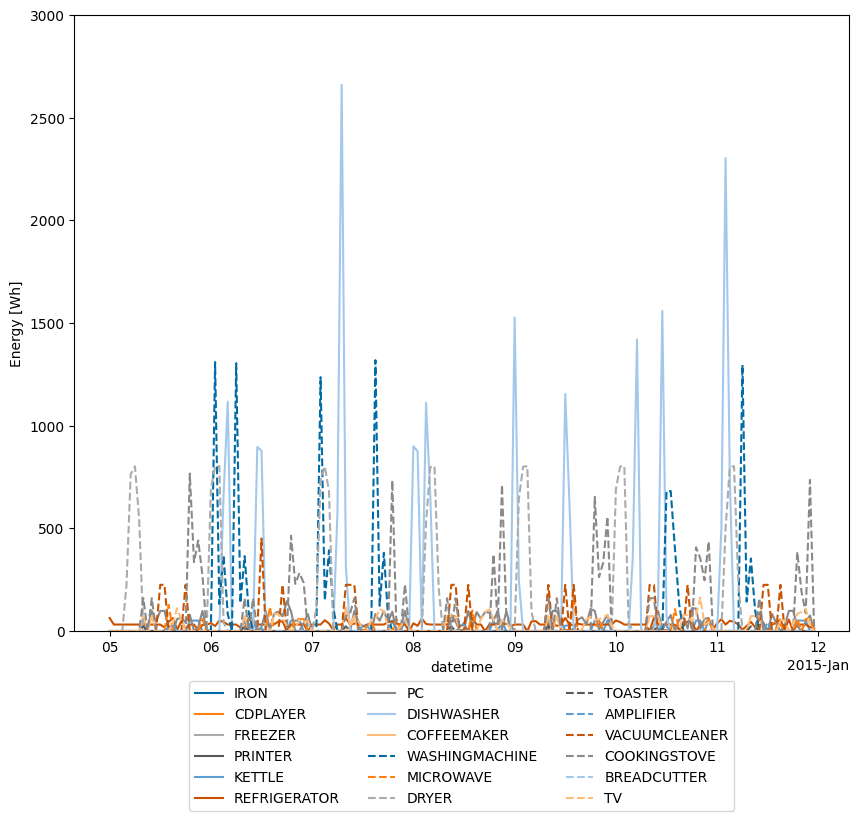

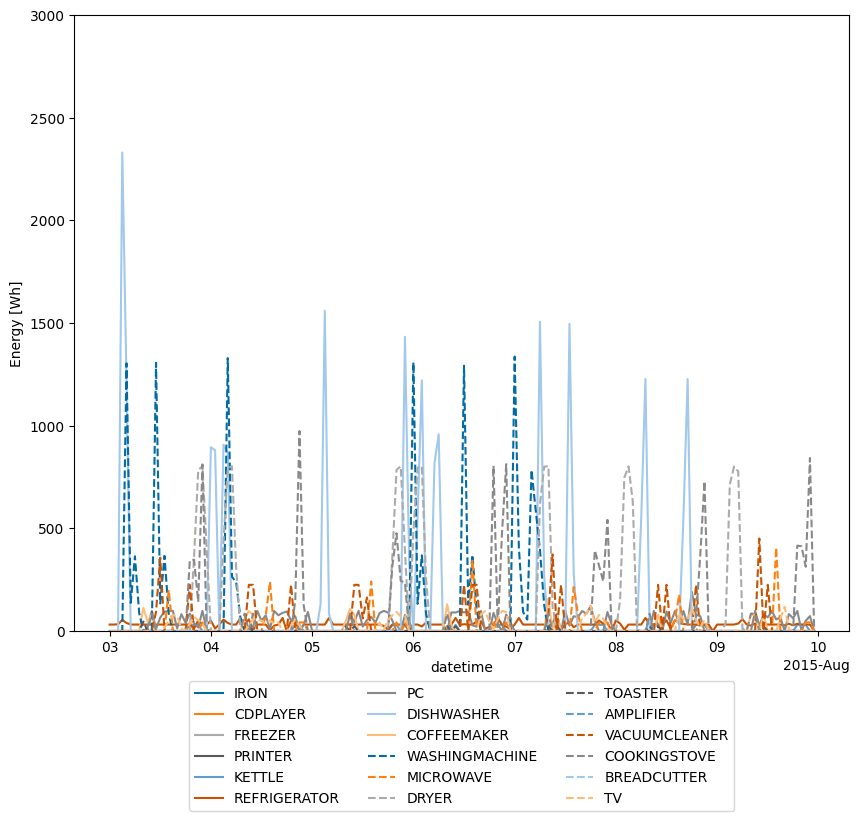

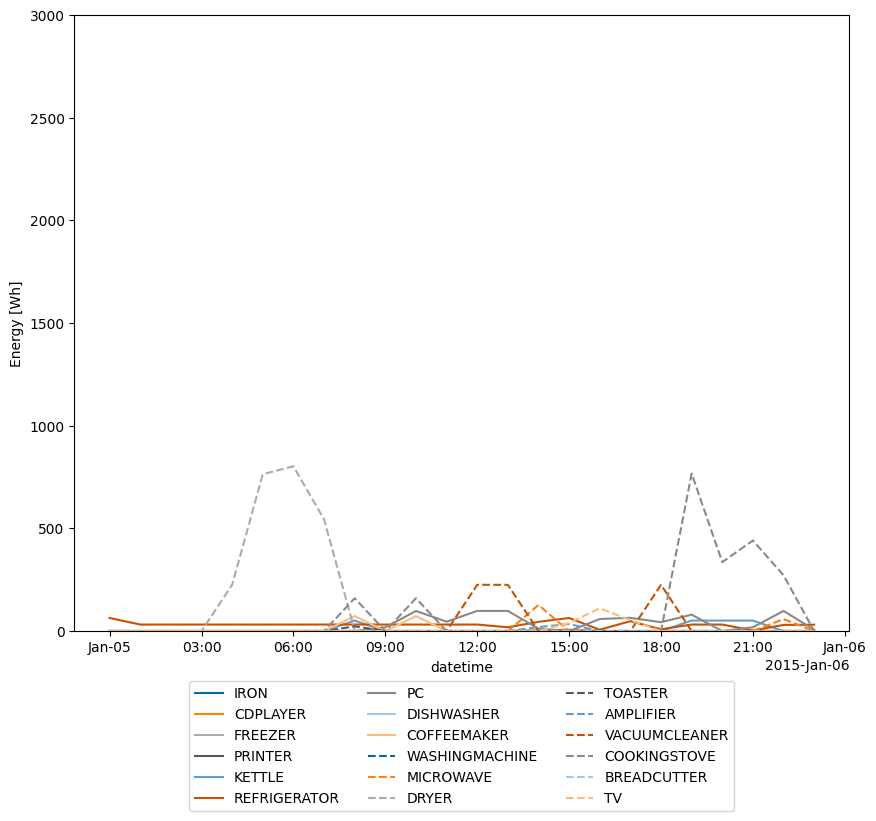

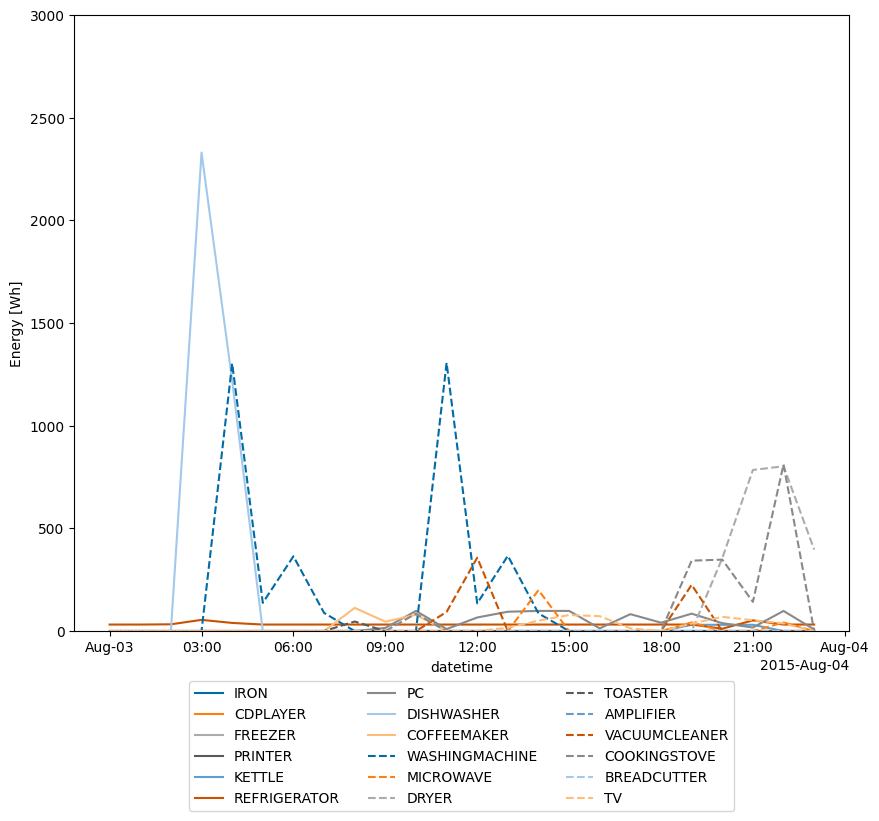

In [ ]:
line_types = ['solid','dashed','dotted'] 
def plot_appliances(
        appliance_list:list,
        start_index:Optional[int]=None,
        end_index:Optional[int]=None,
        filename:str="") -> None:
    fig, ax = plt.subplots(figsize=FIGSIZE)
    color_list = list(CB_COLORS.values())
    
    color = 0
    line_style = 0
    for appliance in appliance_list:
        with open(os.path.join("data_synthetic","consuming_actors_hours","actor_03",f"{appliance}.csv")) as f:
            data = pd.read_csv(f,sep=';')
        dates_data = pd.to_datetime(data["Datetime"])
        consumption_data = data["Energy_Consumed_Wh"]
        
        start = start_index if start_index else 0
        end = end_index if end_index else len(dates_data)
        x = dates_data[start:end]
        y = consumption_data[start:end]
        ax.plot(x,y, color = color_list[color],linestyle= line_types[line_style], label=f"{appliance}") #color = color_list[color]
        
        if color < 8:
            color += 1
        else:
            color = 0
            line_style +=1
    
    
    ax.set_xlabel('datetime')
    ax.set_ylabel('Energy [Wh]')
    ax.set_ylim(0,3000)
    locator = mdates.AutoDateLocator(minticks=3, maxticks={"YEARLY":1,"MONTHLY":1,"HOURLY":1})
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.legend(loc='upper center', ncols=3, bbox_to_anchor=(0.5, -0.07),)
    if filename:
        plt.savefig(filename,format="pdf",bbox_inches='tight')
    else:
        plt.show()

mypath = os.path.join("data_synthetic","consuming_actors_hours","actor_03")
appliances = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
appliances = [os.path.splitext(x)[0] for x in appliances]
appliances = list(filter(lambda x: str.isupper(x), appliances))

#plot_appliances(appliances,filename=os.path.join(folder,"appliances_cons_all.pdf"))
#plot_appliances(appliances,YEAR_START,YEAR_END,filename=os.path.join(folder,"appliances_cons_year.pdf"))
plot_appliances(appliances,WEEK_1_START,WEEK_1_END,filename=os.path.join(folder,"appliances_cons_week_jan.pdf"))
plot_appliances(appliances,WEEK_2_START,WEEK_2_END,filename=os.path.join(folder,"appliances_cons_week_aug.pdf"))
plot_appliances(appliances,DAY_1_START,DAY_1_END,filename=os.path.join(folder,"appliances_cons_day_jan.pdf"))
plot_appliances(appliances,DAY_2_START,DAY_2_END,filename=os.path.join(folder,"appliances_cons_day_aug.pdf"))

# Actor Energy Production Plots

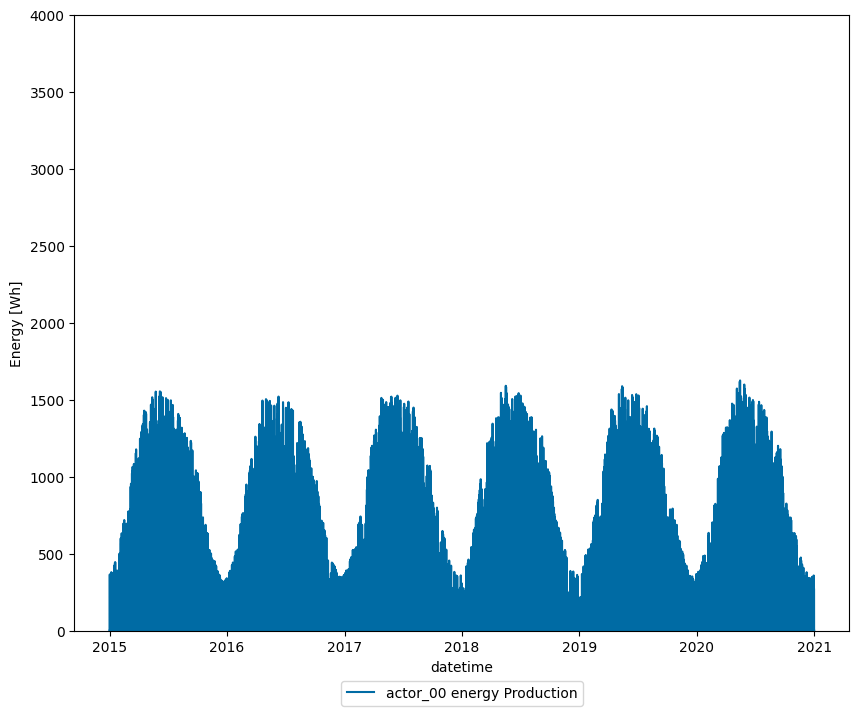

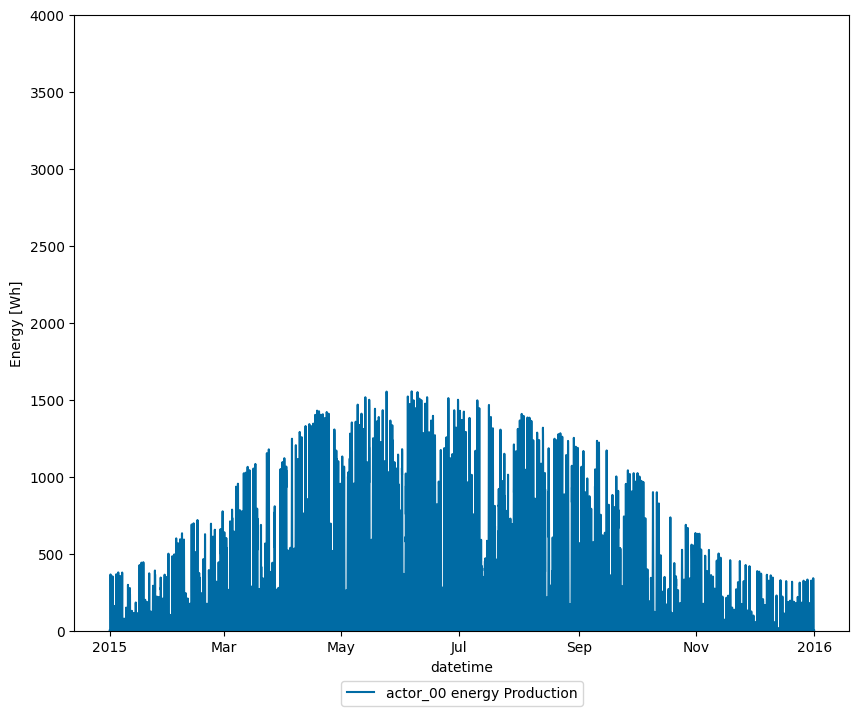

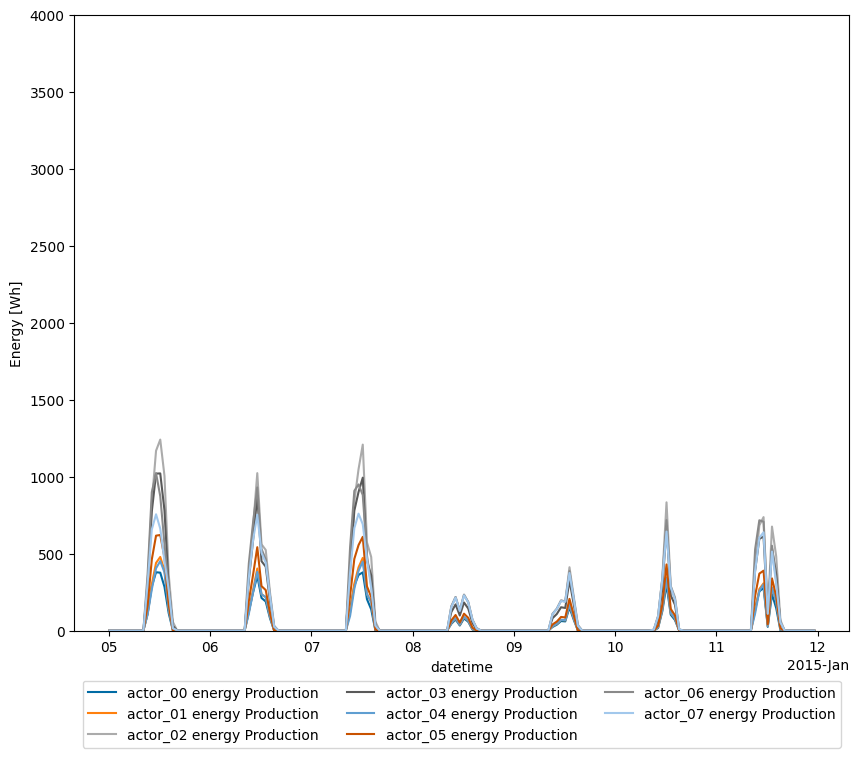

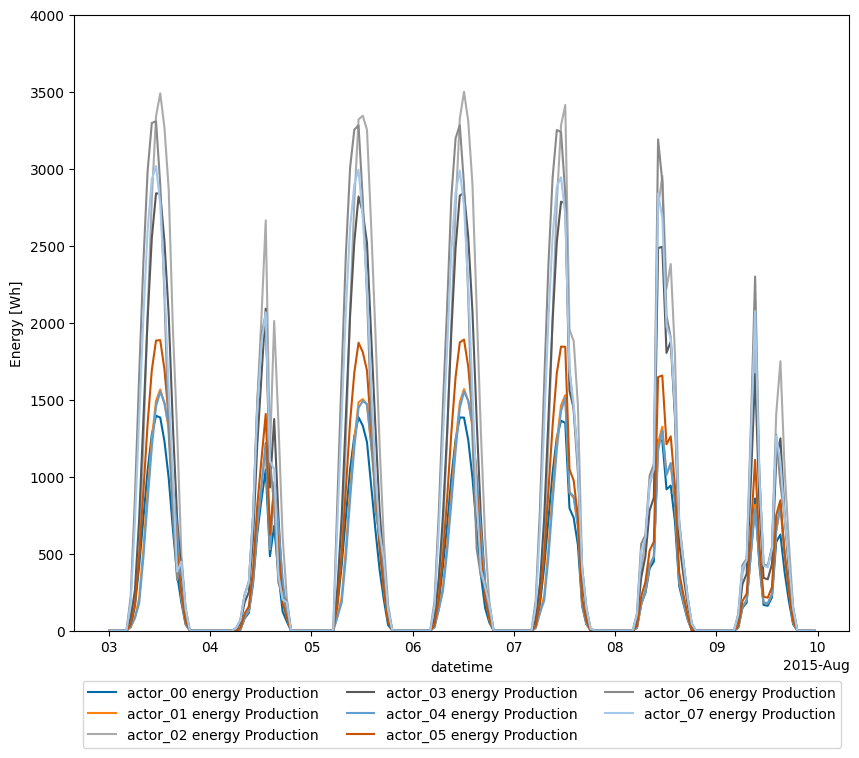

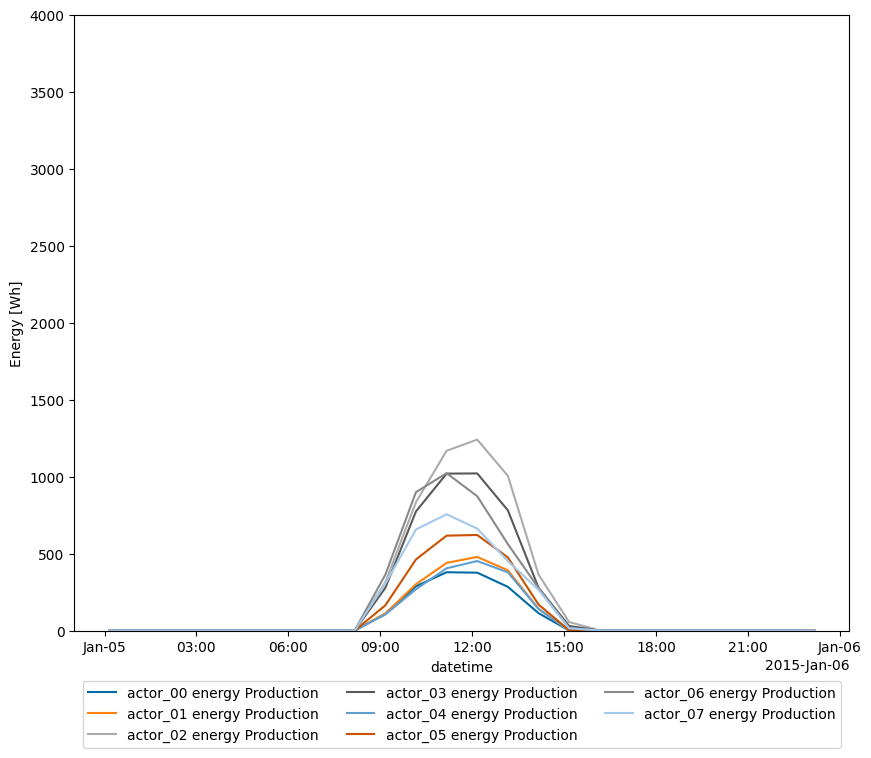

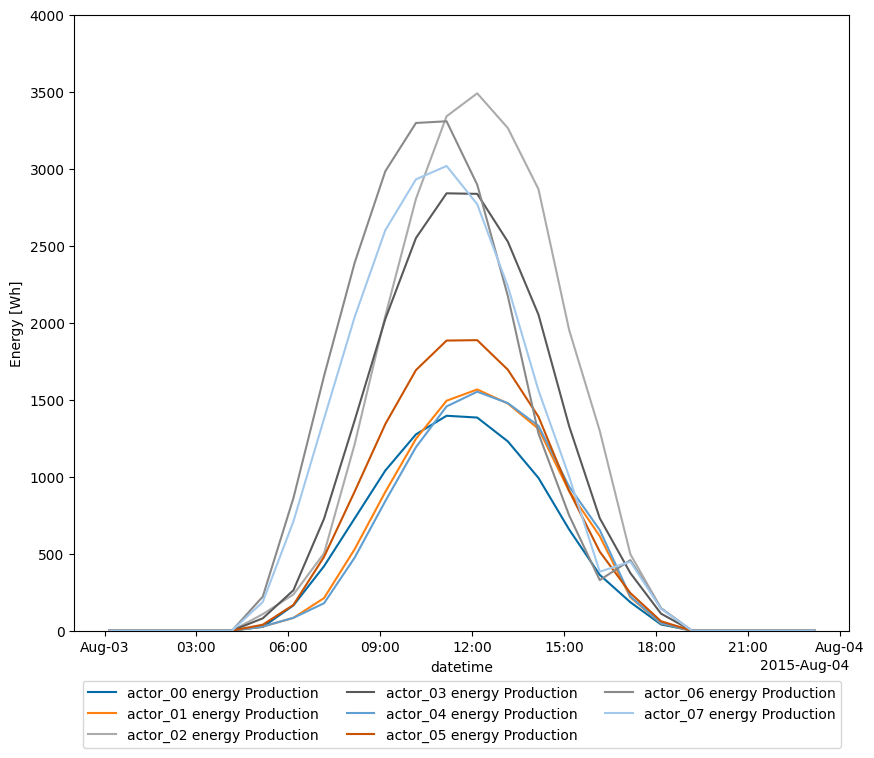

In [ ]:
def plot_actors_PV_production(
        actors_pv_production:Dict[str,pd.DataFrame],
        start_index:Optional[int]=None,
        end_index:Optional[int]=None,
        filename:str="") -> None:
    
    fig, ax = plt.subplots(figsize=FIGSIZE)
    
    actor_names = list(actors_pv_production.keys())
    color_list = list(CB_COLORS.values())
    color = 0
    for actor_name in actor_names:
        x = actors_pv_production[actor_name]["Datetime"]
        start = start_index if start_index else 0
        end = end_index if end_index else len(x)
        
        x = np.asarray(x, dtype='datetime64[s]')[start:end]
        ax.plot(x,actors_pv_production[actor_name]["Energy_Produced_Wh"][start:end],color =color_list[color], label=f"{actor_name} energy Production")
        color += 1
    ax.set_xlabel('datetime')
    ax.set_ylabel('Energy [Wh]')
    ax.set_ylim(0,4000)
    locator = mdates.AutoDateLocator(minticks=3, maxticks={"YEARLY":1,"MONTHLY":1,"HOURLY":1})
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.legend(loc='upper center', ncols=3, bbox_to_anchor=(0.5, -0.07),)
    if filename:
        plt.savefig(filename,format="pdf",bbox_inches='tight')
    else:
        plt.show()


agent_productions = synthprod.load_actor_production(actor_list=["actor_00","actor_01","actor_02","actor_03","actor_04","actor_05","actor_06","actor_07"])
folder = os.path.join("notebooks","synthetic_data_plots")
plot_actors_PV_production({key: agent_productions[key] for key in ["actor_00"]},filename=os.path.join(folder,"actor_prod_all.pdf"))
plot_actors_PV_production({key: agent_productions[key] for key in ["actor_00"]},YEAR_START,YEAR_END,filename=os.path.join(folder,"actor_prod_year.pdf"))
plot_actors_PV_production(agent_productions,WEEK_1_START+(24*4),WEEK_1_END+(24*4),filename=os.path.join(folder,"actor_prod_week_jan.pdf"))
plot_actors_PV_production(agent_productions,WEEK_2_START+(24*4),WEEK_2_END+(24*4),filename=os.path.join(folder,"actor_prod_week_aug.pdf"))
plot_actors_PV_production(agent_productions,DAY_1_START+(24*4),DAY_1_END+(24*4),filename=os.path.join(folder,"actor_prod_day_jan.pdf"))
plot_actors_PV_production(agent_productions,DAY_2_START+(24*4),DAY_2_END+(24*4),filename=os.path.join(folder,"actor_prod_day_aug.pdf"))

# Global market Day-Ahead Prices Plots

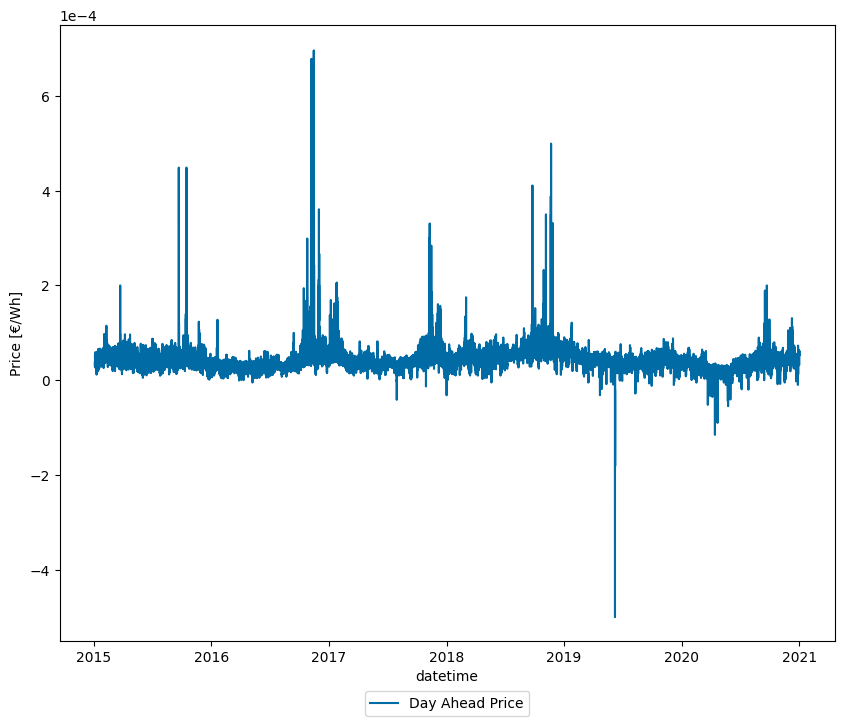

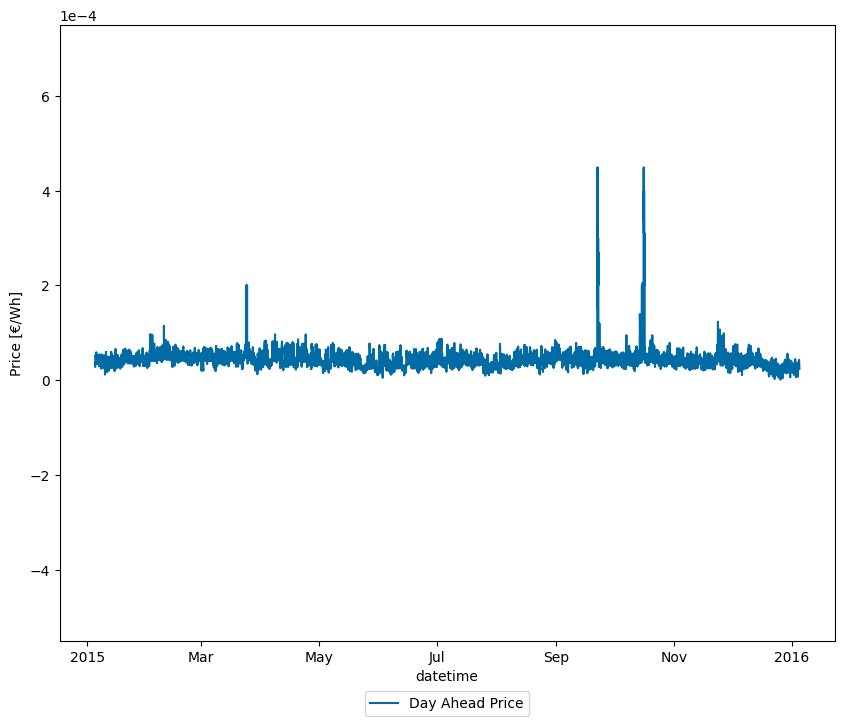

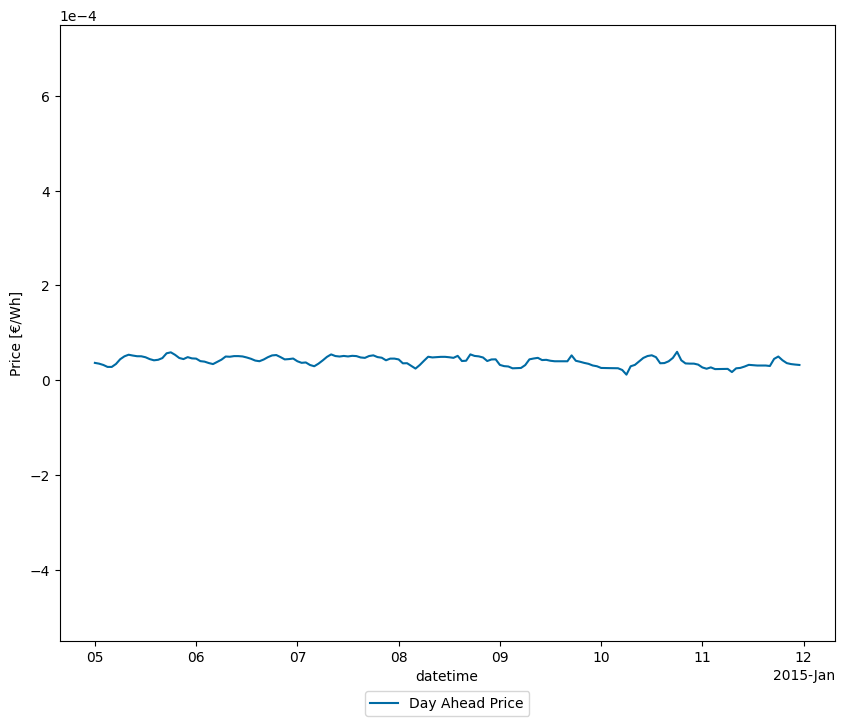

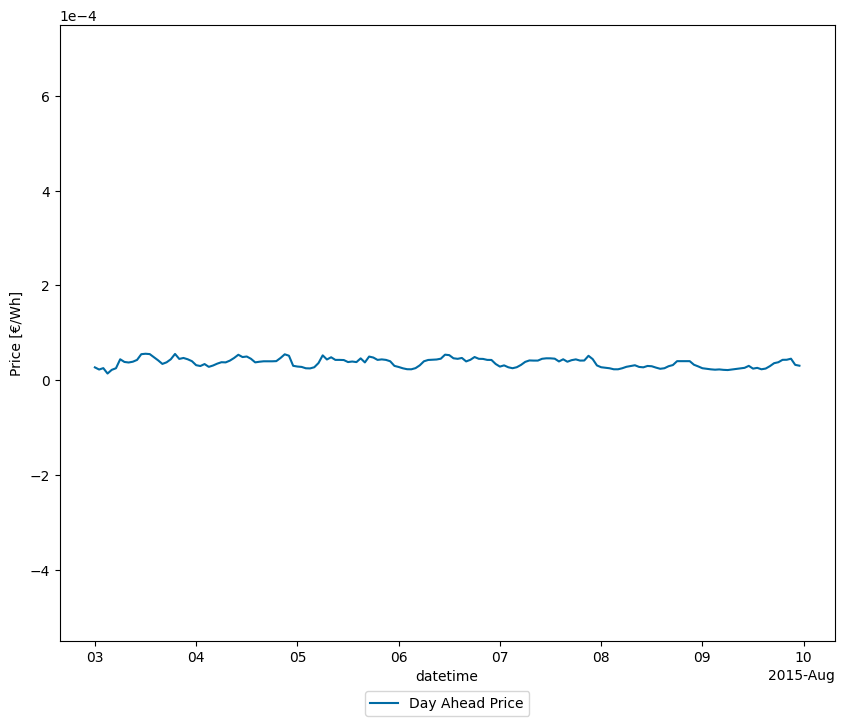

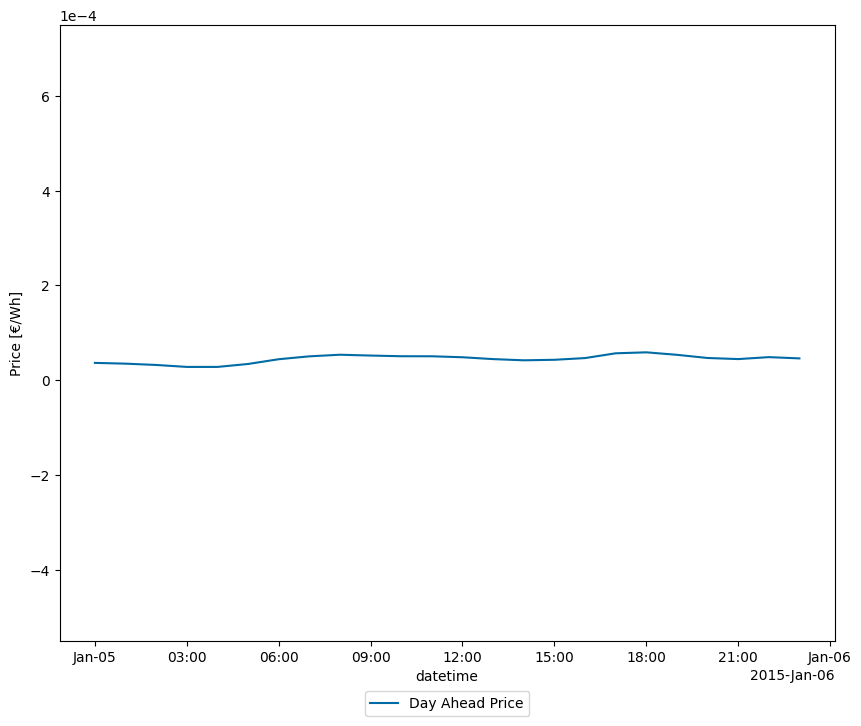

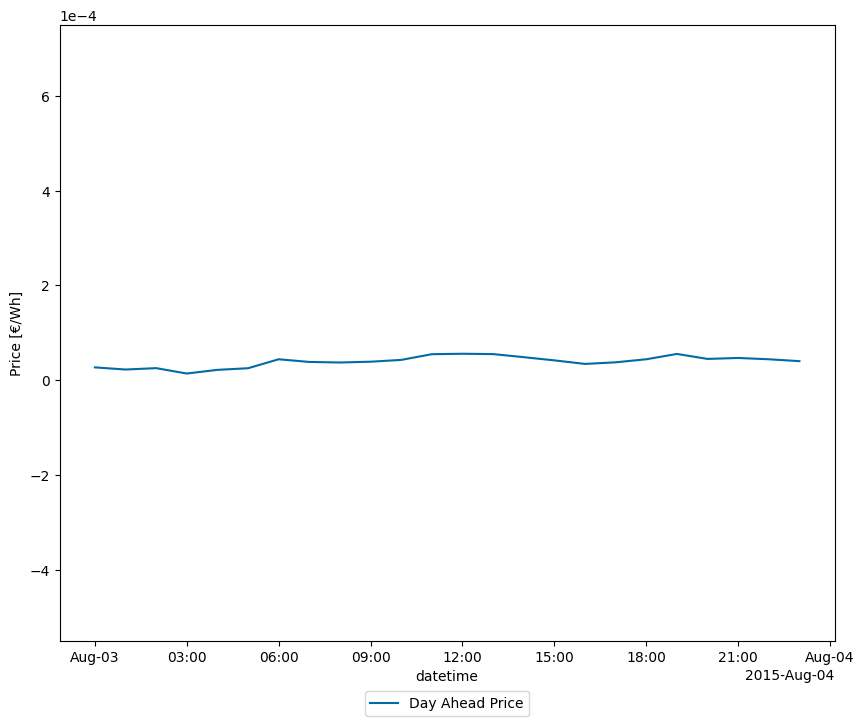

In [ ]:
def plot_globalmarket(
        global_market:pd.DataFrame,
        start_index:Optional[int]=None,
        end_index:Optional[int]=None,
        filename:str="") -> None:
    
    fig, ax = plt.subplots(figsize=FIGSIZE)
    
    color_list = list(CB_COLORS.values())
    color = 0
    
    x = global_market["Datetime"]
    start = start_index if start_index else 0
    end = end_index if end_index else len(x)
    
    x = np.asarray(x, dtype='datetime64[s]')[start:end]
    ax.plot(x,global_market["Day_ahead_price_Wh"][start:end],color =color_list[color], label=f"Day Ahead Price")
    ax.set_xlabel('datetime')
    ax.set_ylabel('Price [€/Wh]')
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax.set_ylim([-5.5e-4, 7.5e-4])
    #ax.set_ylim(0,4000)
    locator = mdates.AutoDateLocator(minticks=3, maxticks={"YEARLY":1,"MONTHLY":1,"HOURLY":1})
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.legend(loc='upper center', ncols=3, bbox_to_anchor=(0.5, -0.07),)
    if filename:
       plt.savefig(filename,format="pdf",bbox_inches='tight')
    else:
        plt.show()


global_market = global_market_data = pd.read_csv(os.path.join("data_synthetic","globalmarket","globalmarket.csv"), sep=';', header=0, usecols=['Datetime','Day_ahead_price_Wh'])
folder = os.path.join("notebooks","synthetic_data_plots")
plot_globalmarket(global_market,filename=os.path.join(folder,"glob_market_all.pdf"))
plot_globalmarket(global_market,YEAR_START,YEAR_END,filename=os.path.join(folder,"glob_market_year.pdf"))
plot_globalmarket(global_market,WEEK_1_START,WEEK_1_END,filename=os.path.join(folder,"glob_market_week_jan.pdf"))
plot_globalmarket(global_market,WEEK_2_START,WEEK_2_END,filename=os.path.join(folder,"glob_market_week_aug.pdf"))
plot_globalmarket(global_market,DAY_1_START,DAY_1_END,filename=os.path.join(folder,"glob_market_day_jan.pdf"))
plot_globalmarket(global_market,DAY_2_START,DAY_2_END,filename=os.path.join(folder,"glob_market_day_aug.pdf"))

mean day ahead price: 4.2058969568860314e-05
min day ahead price: -0.0005
max day ahead price: 0.00069602
mean energy produced over all actors: 319.8389251505761
min energy produced over all actors: -2.0155802202843747
max energy produced over all actors: 4086.4188858597313
mean energy consumed over all actors: 319.66687399771587
min energy consumed over all actors: 10.0
max energy consumed over all actors: 4667.395333333334


(0.0, 5000.0)

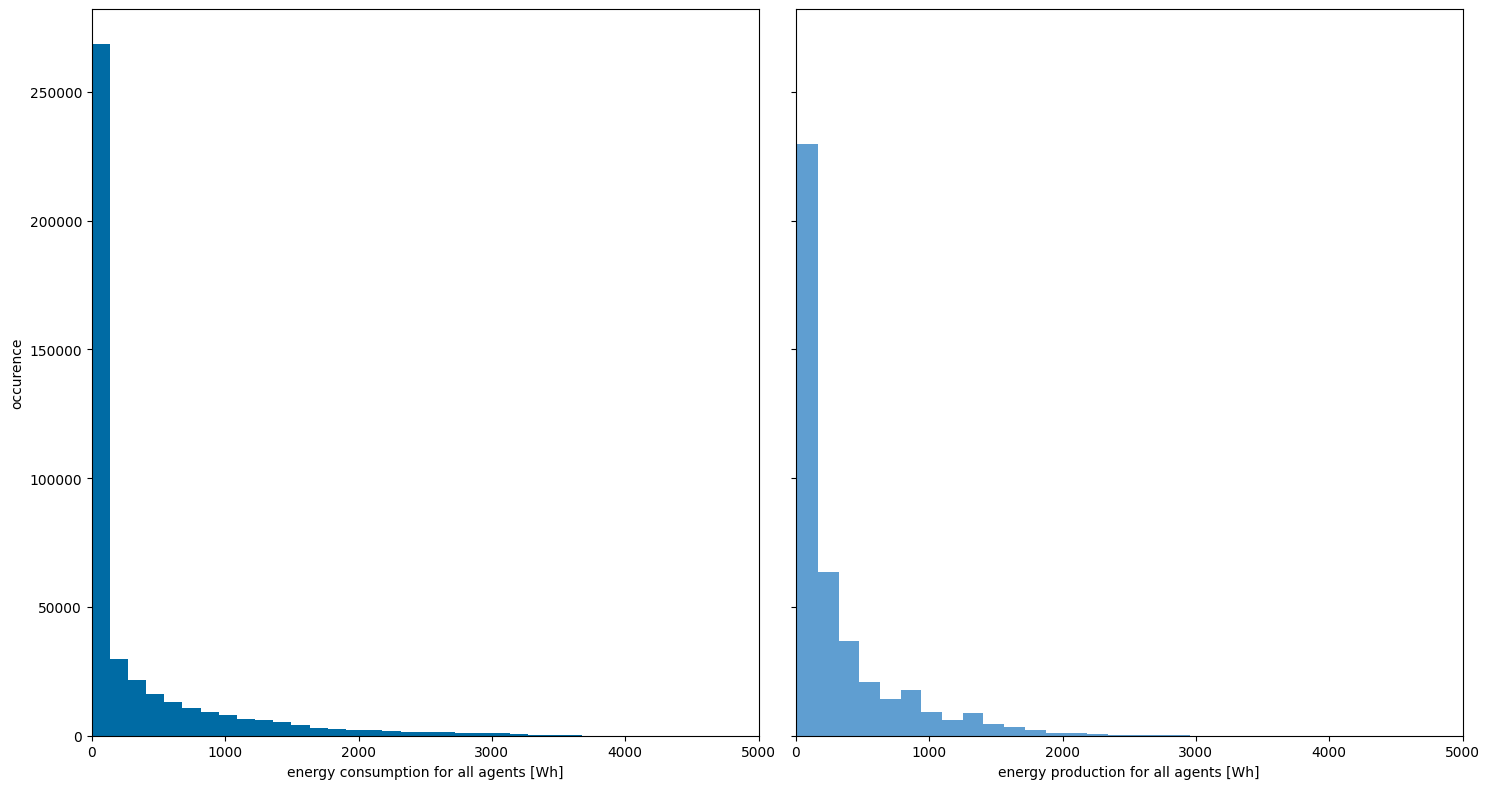

In [ ]:
day_ahead_prices = pd.read_csv(os.path.join("data_synthetic","globalmarket","globalmarket.csv"), sep=';', header=0, usecols=['Datetime','Day_ahead_price_Wh'])

day_ahead_prices_mean = day_ahead_prices["Day_ahead_price_Wh"].mean()
day_ahead_prices_std = day_ahead_prices["Day_ahead_price_Wh"].std()
day_ahead_prices_min = day_ahead_prices["Day_ahead_price_Wh"].min()
day_ahead_prices_max = day_ahead_prices["Day_ahead_price_Wh"].max()

print(f"mean day ahead price: {day_ahead_prices_mean}")
print(f"min day ahead price: {day_ahead_prices_min}")
print(f"max day ahead price: {day_ahead_prices_max}")

agent_productions = synthprod.load_actor_production(actor_list=ACTOR_LIST)

energy_produced = pd.DataFrame([])
for actor in ACTOR_LIST:
 energy_produced = pd.concat([energy_produced,agent_productions[actor]["Energy_Produced_Wh"]])

energy_produced_mean = energy_produced["Energy_Produced_Wh"].mean()
energy_produced_std = energy_produced["Energy_Produced_Wh"].std()
energy_produced_min = energy_produced["Energy_Produced_Wh"].min()
energy_produced_max = energy_produced["Energy_Produced_Wh"].max()

print(f"mean energy produced over all actors: {energy_produced_mean}")
print(f"min energy produced over all actors: {energy_produced_min}")
print(f"max energy produced over all actors: {energy_produced_max}")

agent_consumptions = synthcons.load_house_consumption(actor_list=["actor_00","actor_01","actor_02","actor_03","actor_04","actor_05","actor_06","actor_07"])


energy_consumed = pd.DataFrame([])
for actor in ACTOR_LIST:
 energy_consumed = pd.concat([energy_consumed,agent_consumptions[actor]["Energy_Consumed_Wh"]])

energy_consumed_mean = energy_consumed["Energy_Consumed_Wh"].mean()
energy_consumed_std = energy_consumed["Energy_Consumed_Wh"].std()
energy_consumed_min = energy_consumed["Energy_Consumed_Wh"].min()
energy_consumed_max = energy_consumed["Energy_Consumed_Wh"].max()

print(f"mean energy consumed over all actors: {energy_consumed_mean}")
print(f"min energy consumed over all actors: {energy_consumed_min}")
print(f"max energy consumed over all actors: {energy_consumed_max}")

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True,figsize= (15,8))

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(energy_produced["Energy_Produced_Wh"], bins=30,color = CB_COLORS["dark_blue"] )
axs[0].set_xlabel("energy consumption for all agents [Wh]")
axs[0].set_ylabel("occurence")
axs[0].set_xlim(0,5000)
axs[1].hist(energy_consumed["Energy_Consumed_Wh"], bins=30, color = CB_COLORS["blue"])
axs[1].set_xlabel("energy production for all agents [Wh]")
axs[1].set_xlim(0,5000)
